# Podstawy Sztucznej Inteligencji 2020/2021


Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

# Klasyfikator minimalno-odległościowy

Notatnik ten zawiera implementacją klasyfikatora minimalno-odległościowego w numpy. Jest on podobny do omawianego na ćwiczeniach klasyfikatora kNN, jednak znacznie od niego prostszy.

**1\. Generacja danych.**

Tym razem, zamiast wczytywać dane, wygeneruj je z wykorzystaniem funkcji [make_blobs](http://scikit-learn.org/0.16/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs). 

Ustaw ilość próbek na `500`, a ilość grup (centrów) na `3`. Ponadto, aby twoje rysunki były analogiczne jak przedstawione poniżej, ważne jest ustawienie `random_state=2`.


In [3]:
%matplotlib inline
import numpy as np 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import datasets 
from sklearn.neighbors import NearestCentroid
import matplotlib.pyplot as plt

#metoda generujaca dane treningowe i testowe
from sklearn.datasets import make_blobs

blobs_data, blobs_target = make_blobs(n_samples=500, centers=3, random_state=2)
# blobs_target - gdzie obiekt z blobs_data powinien należeć
# centers - trzy grupy

In [4]:
assert blobs_data.shape == (500, 2)
assert blobs_data.shape[0] == blobs_target.shape[0]

**Wizualizacja wygenerowanych danych**

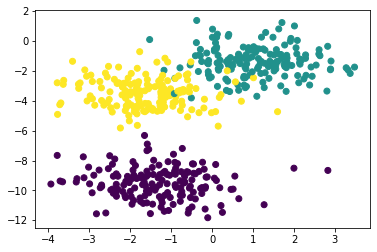

In [5]:
plt.scatter(blobs_data[:,0], blobs_data[:,1], c = np.ravel(blobs_target))

**2\. Normalizacja danych wejściowych**

Przed rozpoczęciem należy zapewnić bezpośrednią porównywalność cech, czyli dokonać normalizacji. Skorzystaj ze wzoru z [Definicji 2](http://books.icse.us.edu.pl/runestone/static/ai/IstotaUczeniaNadzorowanegoINienadzorowanego/ReprezentacjaWzorcow.html#przetwarzanie-wstepne) 
 

 

In [6]:
def normalize(v):
    return (v - np.mean(v, axis=0)) / np.std(v, axis=0)

In [7]:
blobs_data_normalized = normalize(blobs_data)

np.testing.assert_array_almost_equal(blobs_data_normalized[100], np.array([0.39173587, 0.67031484]))

*Wykres po normalizacji*

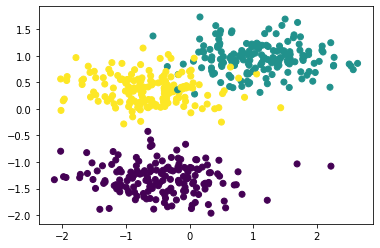

In [8]:
plt.scatter(blobs_data_normalized[:, 0], blobs_data_normalized[:, 1], c = np.ravel(blobs_target))

**3\. Podział na dane treningowe i testowe.**

W sposób losowy podziel wygenerowane dane na zriór uczący i testowy w proporcji 70% do 30%. Ustaw `random_state=123`

In [9]:
train, test, train_labels, test_labels = train_test_split(normalize(blobs_data), blobs_target, test_size=0.30, random_state=123)

In [10]:
assert np.shape(train)[0] == 0.7 * np.shape(blobs_data_normalized)[0]
assert np.shape(test)[0] == np.shape(blobs_data_normalized)[0] - np.shape(train)[0]

**4\. Wyznacz obiekt typowy dla każdej klasy, czyli prezentowana przez jeden typowy dla niej obiekt.**

W roli tego reprezentanta najczęściej występuje środek (średnia arytmetyczna) obiektów z danej klasy. 

In [11]:
class_means = []

for i in np.unique(train_labels):
    x = np.mean(train[train_labels==i], axis=0)
    class_means.append(x)

class_means = np.array(class_means)
print(class_means)

#Drugi sposób:
#class_means = np.vstack([ np.mean( train[(train_labels==i)], axis=0) for i in np.unique(train_labels) ])

[[-0.49010974 -1.31550465]
 [ 1.01046553  0.96259107]
 [-0.64904608  0.36325169]]


In [25]:
assert class_means[0,1]==-1.3155046512783324

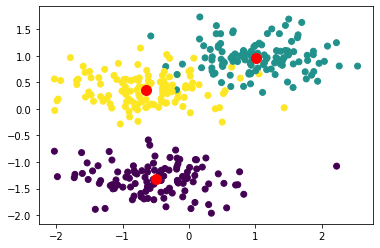

In [26]:
plt.scatter(train[:,0], train[:,1],c= np.ravel(train_labels))
plt.plot(class_means[0,0], class_means[0,1], 'ro',markersize=10)
plt.plot(class_means[1,0], class_means[1,1], 'ro',markersize=10)
plt.plot(class_means[2,0], class_means[2,1], 'ro',markersize=10)

**5\. Odległość wektorów testowych od reprezentantów klas**

Dla każdej danej testowej, reprezentowanej przez wektor cech wyznacz odległość od reprezentantów klas


In [30]:
def distances(x):
    lista = []
    
    for i in range(len(class_means)):
        z = np.sqrt(np.sum((x - class_means[i])**2, axis=1))
        lista.append(z)

    lista = np.stack(lista).T
    #print(lista)
    
    return lista

# Drugi sposób:
# return np.stack([ np.sqrt(np.sum( (x - class_means[i])**2, axis=1)) for i in range(len(class_means)) ]).T

In [31]:
assert distances(test).shape == (150,3)
assert distances(test)[1,1]==1.7886834573805668

**6\. Funkcja klasyfikująca**

Dla danych testowych wyznacza klasę, dla której obiekt ją reprezentujący jest najbliższy.

In [32]:
def classify(x):
    return np.argmin(distances(x), axis=1)

In [33]:
assert classify(test).shape == (150,)
assert classify(test)[100]==2

**7\. Jaki jest procent poprawych odpowiedzi?**

In [34]:
score = np.sum(classify(test) == test_labels)
score = score / len(test_labels)
print(score)

0.9666666666666667


In [35]:
np.testing.assert_almost_equal(score, 0.9666666666666667)

**8\. Stwórz klasę `MinimumDistanceClassifier` analogiczną do klasy `NearestCentroid` z `sklearn`**

In [36]:
class MinimumDistanceClassifier:
    
    #wyznacza elementy reprezentatywne
    def fit(self, train, train_labels):
        class_means = []
        
        for i in np.unique(train_labels):
            x = np.mean(train[train_labels==i], axis=0)
            class_means.append(x)
            
        class_means = np.array(class_means)
        
        return class_means
    
    def distances(self, x):
        class_means = self.fit(train, train_labels)
        lista = []
        
        for i in range(len(class_means)):
            z = np.sqrt(np.sum((x-class_means[i])**2, axis=1))
            lista.append(z)
        
        lista = np.stack(lista).T
        return lista
    
    #wyznacza klasę dla każdej danej testowej
    def predict(self, test):
        
        return np.argmin(self.distances(test), axis=1)
    
    #wyznacza dokładność klasyfikatora
    def score(self, test, test_labels):
        
        score = np.sum(self.predict(test) == test_labels)
        score = score / len(test_labels)
        
        return score
   
        

In [37]:
clf = MinimumDistanceClassifier()
clf.fit(train, train_labels)
clf.score(test, test_labels)
np.testing.assert_almost_equal(score, clf.score(test, test_labels))

**9\. Porównanie z klasyfikatorem `NearestCentroid` z `sklearn`**

In [38]:
from sklearn.neighbors import NearestCentroid 

ncent = NearestCentroid()
ncent.fit(train, train_labels)
np.testing.assert_array_almost_equal(ncent.predict(test),  clf.predict(test))
assert ncent.score(test, test_labels) == clf.score(test, test_labels)

In [39]:
h = .02
x_min, x_max = train[:, 0].min() - 1, train[:, 0].max() + 1
y_min, y_max = train[:, 1].min() - 1, train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

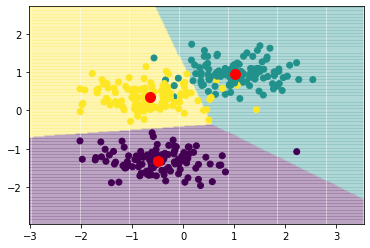

In [40]:
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, alpha=0.1)
plt.scatter(train[:,0], train[:,1],c= np.ravel(train_labels))
plt.plot(class_means[0,0], class_means[0,1], 'ro',markersize=10)
plt.plot(class_means[1,0], class_means[1,1], 'ro',markersize=10)
plt.plot(class_means[2,0], class_means[2,1], 'ro',markersize=10)